In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mlp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [4]:
train_cols = [
    'Sex',
    'Length',
    "Diameter",
    "Height",
    "Weight",
    "Shucked Weight",
    "Viscera Weight",
    "Shell Weight"
]

In [5]:
train = data[train_cols]

In [6]:
train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.5+ MB


Text(0, 0.5, 'Age')

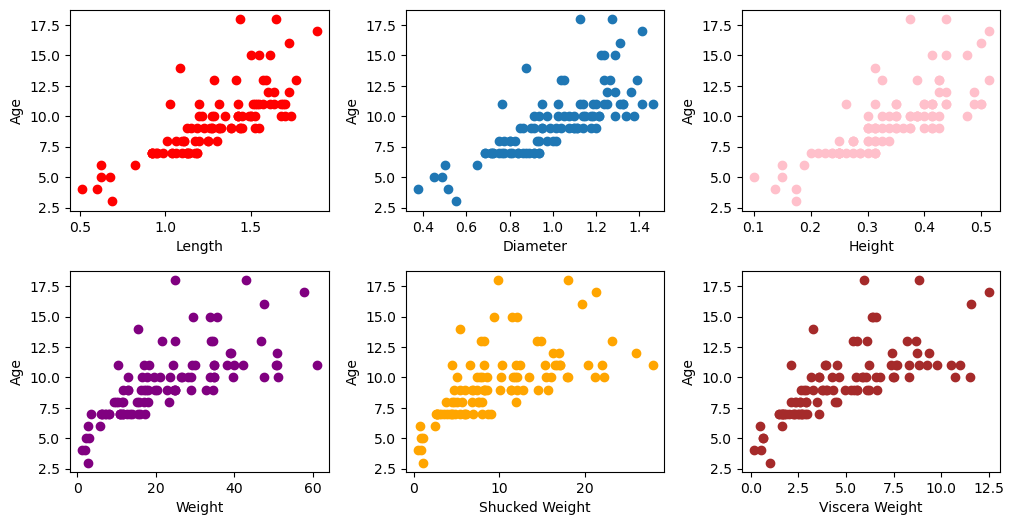

In [8]:
fig, ax = plt.subplots(2,3, figsize = (12,6))
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)
ax[0,0].scatter(train['Length'][:100], data['Age'][:100], color = 'red')
ax[0,0].set_xlabel('Length')
ax[0,0].set_ylabel('Age')

ax[0,1].scatter(train['Diameter'][:100], data['Age'][:100])
ax[0,1].set_xlabel('Diameter')
ax[0,1].set_ylabel('Age')

ax[0,2].scatter(train['Height'][:100], data['Age'][:100], color = 'pink')
ax[0,2].set_xlabel('Height')
ax[0,2].set_ylabel('Age')

ax[1,0].scatter(train['Weight'][:100], data['Age'][:100], color = 'purple')
ax[1,0].set_xlabel('Weight')
ax[1,0].set_ylabel('Age')

ax[1,1].scatter(train['Shucked Weight'][:100], data['Age'][:100],color =  'orange')
ax[1,1].set_xlabel('Shucked Weight')
ax[1,1].set_ylabel('Age')

ax[1,2].scatter(train['Viscera Weight'][:100], data['Age'][:100], color = 'brown')
ax[1,2].set_xlabel('Viscera Weight')
ax[1,2].set_ylabel('Age')

In [9]:
train['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [10]:
sex = {
    'M':0,
    'I':1,
    'F':2
}

In [11]:
train['Sex'] = train['Sex'].map(sex)

C:\Users\hashi\AppData\Local\Temp\ipykernel_8408\882771120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex'] = train['Sex'].map(sex)


In [12]:
train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,0,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,2,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
...,...,...,...,...,...,...,...,...
74046,2,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687
74048,2,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607
74049,1,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  int64  
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 4.5 MB


In [14]:
train['Sex'] = train['Sex'].astype('float64')

C:\Users\hashi\AppData\Local\Temp\ipykernel_8408\375338323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex'] = train['Sex'].astype('float64')


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  float64
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
dtypes: float64(8)
memory usage: 4.5 MB


In [16]:
labels = data['Age']

In [17]:
labels.dtype

dtype('int64')

In [18]:
labels = labels.astype('float64')

In [19]:
train.shape

(74051, 8)

In [20]:
labels.shape

(74051,)

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(train, labels, test_size = 0.2)

In [22]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(59240, 8)
(14811, 8)
(59240,)
(14811,)


In [23]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [24]:
y_pred = model.predict(xtest)

In [25]:
mse = mean_squared_error(ytest, y_pred)

In [26]:
mse

4.583579320037372

In [27]:
r2 = r2_score(ytest, y_pred)

In [28]:
r2

0.5482288667919285